In [1]:
import numpy as np
import pynbody
import pynbody.filt as filt
import pynbody.units as units
import pynbody.analysis.profile as profile
import matplotlib.pyplot as plt
import sys, os, glob, pickle, struct
import plot_tools

In [26]:
#entries = pickle.load(open("sorted_data_inc.p","rb"))

data_dir = "/scratch/hc2347/pickles/60/main_preload_z0.205"

pickle_files = glob.glob(data_dir+"*.p")

pickle_files.sort()

print(pickle_files)

['/scratch/hc2347/pickles/60/main_preload_z0.205.p']


In [27]:
entry = plot_tools.load_halos_pickle(pickle_files[0])
entry["zred"] = 0.2

['/scratch/kld8/simulations/LRZ_Planck60/planck.new.hydro.60_600.00832', '/scratch/kld8/simulations/LRZ_Planck60/planck.new.hydro.60_600.00448', '/scratch/kld8/simulations/LRZ_Planck60/planck.new.hydro.60_600.00156', '/scratch/kld8/simulations/LRZ_Planck60/planck.new.hydro.60_600.00111', '/scratch/kld8/simulations/LRZ_Planck60/planck.new.hydro.60_600.00084', '/scratch/kld8/simulations/LRZ_Planck60/planck.new.hydro.60_600.00066', '/scratch/kld8/simulations/LRZ_Planck60/planck.new.hydro.60_600.00032']


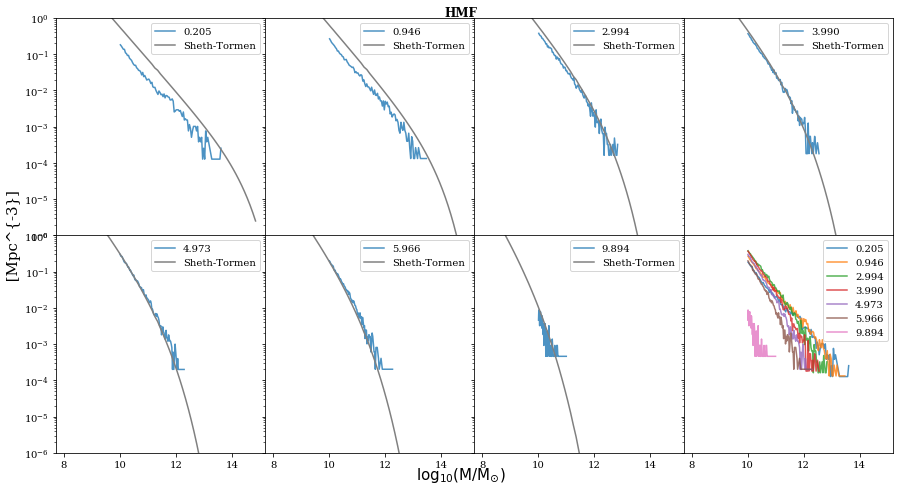

In [46]:
#HMF

def multiplot():
    """Plot evolution as subplots in the same figure."""
    
    fig, axs = plt.subplots(2, 4, sharey=True,sharex=True, figsize=(15,8))
    fig.subplots_adjust(hspace=0,wspace=0)
    fig.suptitle("HMF",fontsize=12,fontweight="bold", y=0.90)

    fig.text(0.5, 0.08, '$\\rm{log_{10}}(M/\\rm M_{\odot})$', ha='center',fontsize=15)
    fig.text(0.08, 0.5, ' [Mpc^{-3}]', va='center', rotation='vertical',fontsize=15)

    #z = 4
    ax_last = axs[1][3]
    sims = pickle.load(open("/scratch/hc2347/references/available_sims.p" , "rb" ))
    sims.reverse()
    print(sims)

for idx, entry in enumerate(entries):
    
    s = pynbody.load(sims[idx].split(".z")[0])
    
    PER_ROW = 4
    row = int(idx/PER_ROW)
    col = idx % PER_ROW

    ax = axs[row][col]
    plot_mf(ax,filter_list(entry["mvir"],10**10,10**15),100,entry["zred"])
    
    stms, stsig, stmf = pynbody.analysis.halo_mass_function(s)
    ax.semilogy(np.log10(stms),stmf,label="Sheth-Tormen", color = "#808080")
    ax.legend()

    plot_mf(ax_last,filter_list(entry["mvir"],10**10,10**15),100,entry["zred"])
    
    ax_last.legend()

plt.savefig("/scratch/hc2347/reports/center_hmf60.png")

/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10


found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4


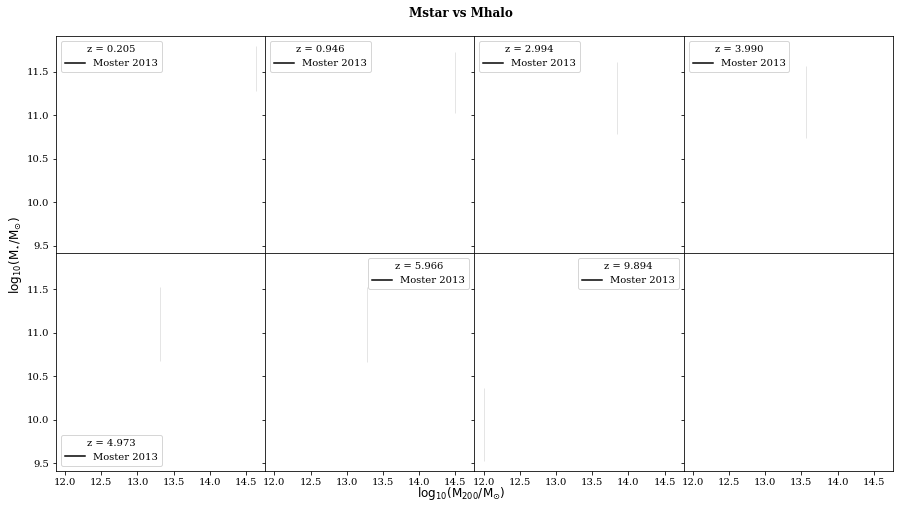

In [42]:
# Mstar/Mhalo

from pynbody.plot.stars import moster
from pynbody.plot.stars import behroozi

zred = 0.204

xlabel = '$\\rm{log_{10}}(M_{200}/\\rm M_{\odot})$'
ylabel = '$\\rm{log_{10}}(M_{\star}/\\rm M_{\odot})$'
label = '$z \;=\; {}$'.format(zred)
c = 'steelblue'

fig, axs = plt.subplots(2,4,sharey=True,sharex=True, figsize=(15,8))
fig.subplots_adjust(hspace=0, wspace=0)

fig.suptitle("Mstar vs Mhalo",fontsize=12,fontweight="bold", y=0.93)

for idx, entry in enumerate(entries):
    PER_ROW = 4
    row = int(idx/PER_ROW)
    col = idx % PER_ROW

    ax = axs[row][col]
    
    i = np.where(entry["mstar"] > 1)
    
#     x = np.log10(np.array(entry["mvir"][i]))
#     y = np.log10(np.array(entry["mstar"][i]))
    
#     xmin = x.min()
#     xmax = x.max()
#     ymin = y.min()
#     ymax = y.max()

#     ax.axis([xmin, xmax, ymin, ymax])
    
    #ax.hexbin(x, y, gridsize=50,cmap='Blues')
    
    #Moster
    xmasses = np.logspace(np.log10(min(entry['mvir'])),1+np.log10(max(entry['mvir'])),20)
    ystarmasses, errors = moster(xmasses,float(entry["zred"]))
    ax.plot(np.log10(xmasses),np.log10(np.array(ystarmasses)),color="Black",label="Moster 2013")
    ax.plot(np.log10(xmasses),np.log10(np.array(ystarmasses)/np.array(errors)), linestyle='dashed', color = 'grey')
    ax.plot(np.log10(xmasses),np.log10(np.array(ystarmasses)*np.array(errors)), linestyle='dashed', color = 'grey')
    ax.fill_between(np.log10(xmasses),np.log10(np.array(ystarmasses)/np.array(errors)),y2=np.log10(np.array(ystarmasses)*np.array(errors)),
                    color='grey', alpha=0.2)


    if idx in [0,3]:
        if idx == 3:
            idx +=1
        nihao_mstar = nihao('Mstar',idx)
        nihao_mhalo = nihao('Mvir',idx)
        
        #ax.scatter(np.log10(nihao_mhalo), np.log10(nihao_mstar), color='maroon', label = 'Nihao Classic')
    ax.legend(title='z = ' + entry['zred'])
    
    

fig.text(0.5, 0.08, xlabel, ha='center',fontsize=12)
fig.text(0.08, 0.5,ylabel, va='center', rotation='vertical',fontsize=12)

plt.savefig("/scratch/hc2347/reports/Mstar_Mhalo.png")

/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10
/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10
/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


14
14
13
13
12
12
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4
found z=4


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


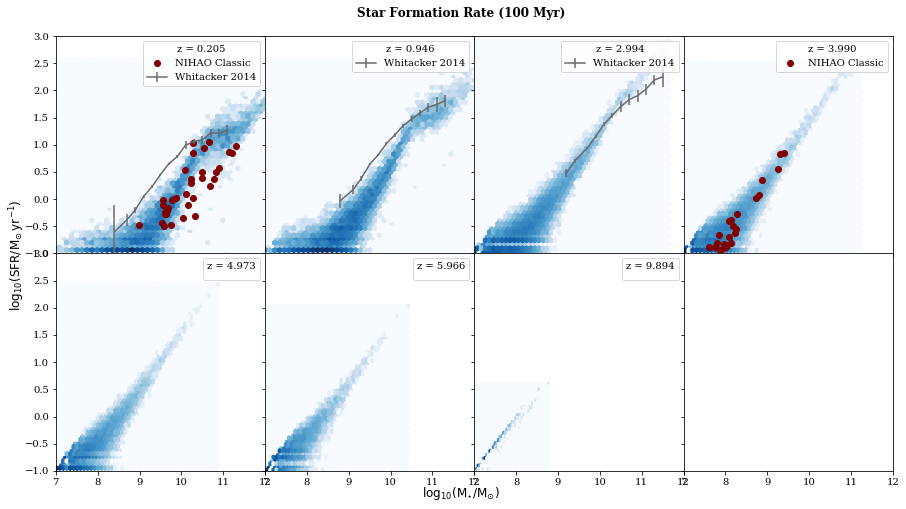

In [13]:
# SFR/Mstar
def do_filter(a, b):
    
    def is_valid(elm):
        return np.isfinite(elm)

    #print(len(b))
    for idx in range(len(b) - 1, -1, -1):
        #print(idx)
        if not is_valid(b[idx]):
                a = np.delete(a,idx)
                b = np.delete(b,idx)
    return a,b

def SFR_plot():
    
    xlabel = '$\\rm{log_{10}}(M_{\star}/\\rm M_{\odot})$'
    ylabel = '$\\rm{log_{10}(SFR/M_{\odot}\,yr^{-1})}$'

    fig, axs = plt.subplots(2,4,sharey=True,sharex=True, figsize=(15,8))
    fig.subplots_adjust(hspace=0, wspace=0)
    
    fig.suptitle("Star Formation Rate (100 Myr)",fontsize=12,fontweight="bold", y=0.93)
    
    xmin = 7
    xmax = 12
    ymin = -1
    ymax = 3
    
    z_list = [0.5, 1, 1.5, 2, 3,4,5,6,7,8]

    for idx, entry in enumerate(entries):
        PER_ROW = 4
        row = int(idx/PER_ROW)
        col = idx % PER_ROW

        ax = axs[row][col]        
        
        label = '$z \;=\; {}$'.format(entry['zred'])

        y = np.log10(np.array(entry["sfr_100"]))  
        x = np.log10(np.array(entry["mstar"]))

        x, y = do_filter(x,y)

        if (len(x) < 10) or (len(y) < 10):
            return None

        hb = ax.hexbin(x, y,  gridsize = 50, bins = 'log', cmap = 'Blues')
        ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
        
        if idx in [0,3]:
            if idx == 3:
                idx +=1
            nihao_x = nihao('Mstar',idx)
            nihao_y = nihao('SFR_100',idx)

            ax.scatter(np.log10(nihao_x), np.log10(nihao_y), color='maroon', label="NIHAO Classic")

        add_obs.SFR_Whitacker(ax, z_list[idx], color ='#696969')
        ax.legend(title='z = ' + entry['zred'])
        
        plt.savefig('/scratch/hc2347/reports/sfr_100.png')


    fig.text(0.5, 0.08, xlabel, ha='center',fontsize=12)
    fig.text(0.08, 0.5,ylabel, va='center', rotation='vertical',fontsize=12)
    
SFR_plot()

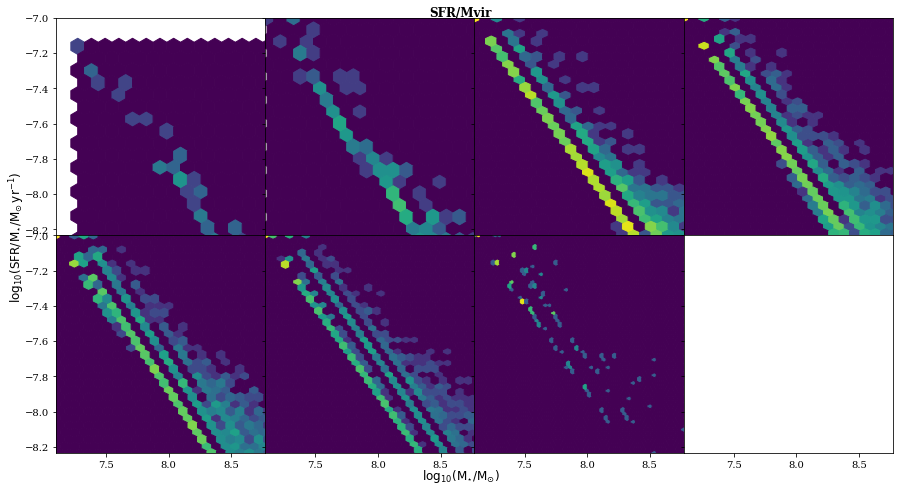

In [14]:
# SFR /Mvir

# SFR/Mstar

def sSFR():

    xlabel = '$\\rm{log_{10}}(M_{\star}/\\rm M_{\odot})$'
    ylabel = '$\\rm{log_{10}(SFR/M_{\star}/M_{\odot}\,yr^{-1})}$'

    fig, axs = plt.subplots(2,4,sharey=True,sharex=True, figsize=(15,8))
    fig.subplots_adjust(hspace=0, wspace=0)

    fig.suptitle('SFR/Mvir',fontsize=12,fontweight="bold", y=0.90)

    for idx, entry in enumerate(entries):
        PER_ROW = 4
        row = int(idx/PER_ROW)
        col = idx % PER_ROW

        ax = axs[row][col]

        mstar = np.array(entry["mstar"])
        sfr = np.array(entry["sfr_10"])

        i = np.where(sfr > 1)
        
        mstar, sfr = plot_tools.do_filter(mstar, sfr)
        
        x = np.log10(mstar)
        y = np.log10(sfr/mstar)
        
        xmin = x.min()
        xmax = x.max()
        ymin = y.min()
        ymax = y.max()

        ax.hexbin(x, y, gridsize=50, bins='log', label = entry["zred"])
        ax.axis([xmin, xmax, ymin, ymax])


    fig.text(0.5, 0.08, xlabel, ha='center',fontsize=12)
    fig.text(0.08, 0.5,ylabel, va='center', rotation='vertical',fontsize=12)


    plt.savefig("/scratch/hc2347/reports/sSFR_10_60.png")
    
sSFR()

In [30]:
entries[0].keys()

dict_keys(['mstar', 'z_star', 'mdm', 'zred', 'z_gas', 'nstar', 'sfr_10', 'mvir', 'mgas', 'ngas', 'mgascool', 'sfr_100', 'npart', 'ndm'])